In [25]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.io import imsave

path = "/content/golden"
g_images = []
g_segments = []

for filename in os.listdir(path):
    if filename.endswith(('png', 'jpg', 'jpeg')):
        img_path = os.path.join(path, filename)
        img = Image.open(img_path)  # open image
        img = img_as_float(img) # convert image to as floats
        slic_seg = slic(img, n_segments=100, compactness = .1, sigma=1, start_label=1, channel_axis=None) # create SLIC segments from image
        g_images.append(img)  # append image to g_images array
        g_segments.append(slic_seg) # append segments to g_segments array
        # both images and segments are in the same index for both arrays

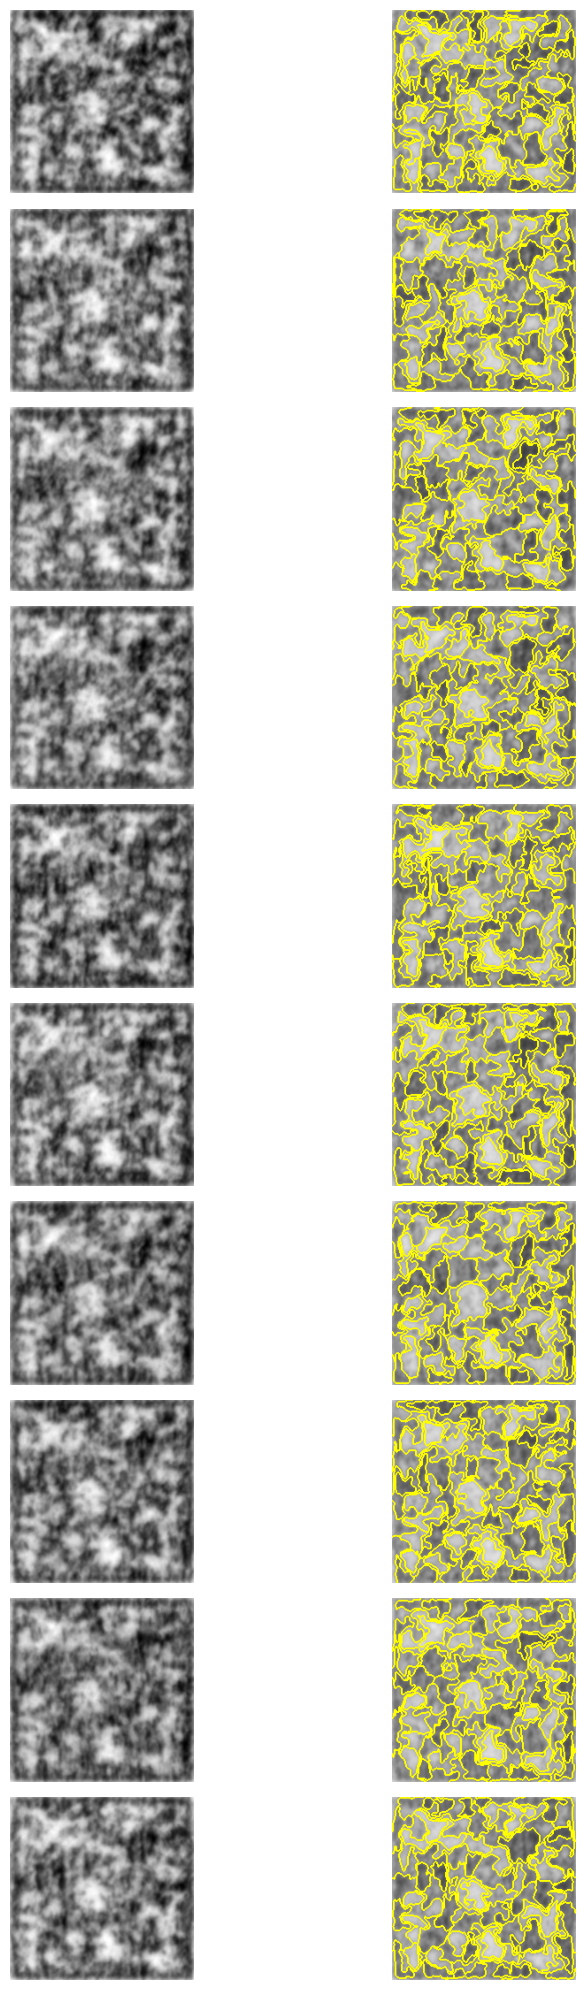

In [37]:
i = 1
plt.figure(figsize=(10,20),tight_layout=True)
for ind, each in enumerate(g_images):
  plt.subplot(10,2,i)
  plt.imshow(each, cmap='gray')
  plt.axis("off")
  i+=1
  plt.subplot(10,2,i)
  bound = mark_boundaries(each, g_segments[ind])
  plt.imshow(bound)
  plt.axis("off")
  i+=1
plt.show()

In [49]:
golden_image = np.mean(g_segments, axis=0).round()

In [50]:
golden_image

array([[ 1.,  1.,  1., ...,  5.,  5.,  5.],
       [ 1.,  1.,  1., ...,  5.,  5.,  5.],
       [ 1.,  1.,  1., ...,  5.,  5.,  5.],
       ...,
       [81., 81., 81., ..., 85., 85., 85.],
       [81., 81., 81., ..., 85., 85., 85.],
       [81., 81., 81., ..., 85., 85., 85.]])

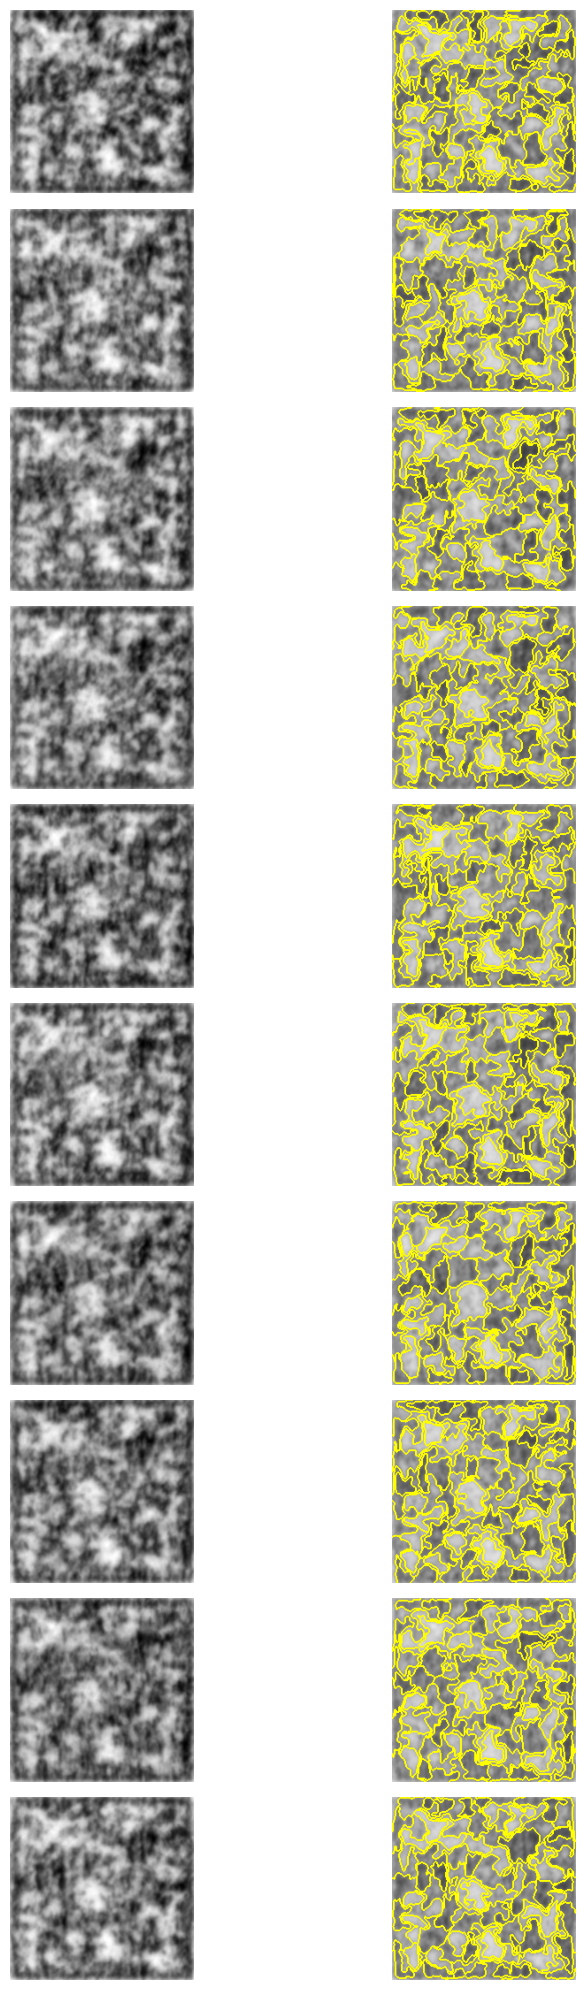

In [51]:
i = 1
plt.figure(figsize=(10,20),tight_layout=True)
for ind, each in enumerate(g_images):
  plt.subplot(10,2,i)
  plt.imshow(each, cmap='gray')
  plt.axis("off")
  i+=1
  plt.subplot(10,2,i)
  bound = mark_boundaries(each, g_segments[ind])
  plt.imshow(bound)
  plt.axis("off")
  i+=1
plt.show()

In [62]:
anom = Image.open("/content/00511.png")  # open image
anom = img_as_float(anom)
anom_seg = slic(anom, n_segments=100, compactness = .1, sigma=1, start_label=1, channel_axis=None)

In [63]:
for ind, each in enumerate(g_segments):
  print(f"Std between GI and Image {ind+1}: {np.std(golden_image - each)}")

print(f"Std between GI and Image ???: {np.std(golden_image - anom_seg)}")

Std between GI and Image 1: 4.06758836141942
Std between GI and Image 2: 3.9458077948640238
Std between GI and Image 3: 3.313740315115112
Std between GI and Image 4: 3.704904440416636
Std between GI and Image 5: 3.743495824467107
Std between GI and Image 6: 3.4935879980843776
Std between GI and Image 7: 3.5278936982552613
Std between GI and Image 8: 3.596372884382727
Std between GI and Image 9: 4.188837645176614
Std between GI and Image 10: 3.266980747797225
Std between GI and Image ???: 4.951214245739354


In [65]:
literal_golden_image = np.mean(g_images, axis=0)

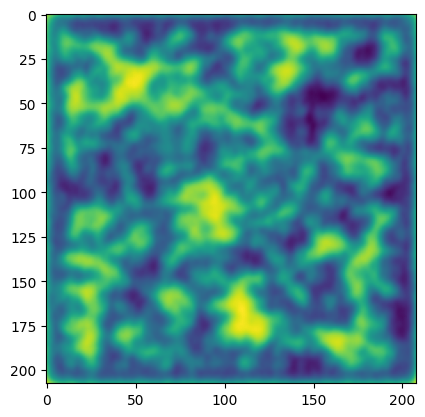

In [66]:
plt.imshow(literal_golden_image)